## **Detecção de Fraudes no Cartão de Credito**


### Contexto:
- Nesse projeto, nos vamos aborda um tema muito presente no nosso cotidiano, que são as fraudes no cartão de credito, isso está presente pois o cartão de crédito e um dos meios mais prefiridos de se fazer pagemnto pelo mundo, no Brasil o uso desse meio de pagamento em compras na internet e em aplicativos aumentou 46,5% no 2º trimestre de 2021 em comparação com o mesmo período de 2020,ou seja, os criminosos sabem que o cartão de crédito e popular e por esse motivo que eles investem tanto neste tipo de fraude é por causa disso que não é atoa que 6 a cada 10 brasileiros caíram em algum tipo de fraude financeira entre julho de 2020 e julho de 2021, ou seja esse e um problema está presente e que todos nos estamos sujeitos á cair em alguma dessas fraudes.
     - As 3 principais fraudes do cartão de credito são:
           - Clonagem de cartão
           - Gerador de números falsos de cartões
           - Ligações e mensagens falsas para roubo de dados

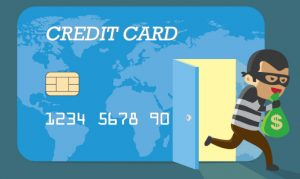

### Como a inteligência artificial pode ajudar nesse problema?

- Devido a esses acontecimentos crescentes de fraudes no cartão de credito, a areá da inteligência artificial(IA) está sendo cada vez mais requisitada para resolver esse probleama, pois, quase todo mundo já deve ter passado pela situação de que foi comprar alguma coisa no mercado ou na padaria e o cartão estava bloqueado, por que isso acontenceu? por que algum modelo de IA viu alguma Incoerência nos seus gastos e resolveu bloquear o cartão, nesse caso foi erronio, e por causa disso que existe um alto investimento em modelos de machine learning, para sempre ter o melhor e mais preciso modelo que erre menos quando for realmente o cliente comprando e acertar quando for uma fraude.

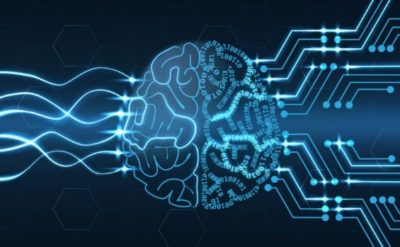

### Qual o objetivo do projeto?
- O objetivo do projeto e construir um modelo que consiga indenficar fraudes em valores extramente desbalanceados, pois geralmente quando estamos lidando com dados assim, o numero de fraudes e extremamente baixo perante as transações executadas normalmente, e por essa razão que os modelos de ML acertam tanto quando e você mesmo comprando e praticamente erram na mesma proporção quando não é você, e por isso que as vezes pode acontencer de olhamos a nossa fatura do cartão e perceber que existem compras que não fomos nos que realizamos, por essa razão que eu vou criar um modelo que consiga mesmo perante dados assim, ter uma boa taxa de previsão das fraudes.


### Fonte dos dados
- A fonte dos meus dados vem do site do Keggle:https://www.kaggle.com/mlg-ulb/creditcardfraud , um site que fornece varias bases de dados publicas com dados reais como esse que vamos usar agora.
    - Explicação da base de dados(Vindo da descrição oficial do site):
        - Os dados são de  Setembro de 2013 fornecidos por titulares de cartões europeus.
        - Das 284,807 mil transações foram encontrados 492 fraudes, 0.17% de fraudes, ou seja, temos uma desbalanceamento muito grande aqui.
        - Outro ponto importante e que so temos valores numericos pois os dados passaram por um PCA(Principal Component Analysis - PCA) e resultou em apenas em colunas com os nomes modificados(Em razão das privatização das fontes de onde eles vieram.) como por exemplo V1,V2 assim por diante, e somente duas colunas não foram modificadas, que são a coluna de 'Time' e 'Amount'.

---

### Etapas do Projeto:
- Etapa 1: Importar as bibliotecas necessarias.
    - Pandas, Matplotlib, entre outras bibliotecas extremamente necessarias para realizar analises.
- Etapa 2: Extração e Limpeza dos dados.
    - Limpar os dados faltantes, verificação da tipografia dos dados, remoção de colunas inuteis, no geral e ver se está tudo bem para progreseguir no projeto.
- Etapa 3: Análise exploratóriados dados
    - Realizar analises no geral, verificar correlações, distribuição entre outras coisas, remoção de outliers caso necessario, analise descritivas dos dados, entre outras coisas.
- Etapa 4: Balanceamento dos valores
    - Como podemos notar na descrição dos dados, os valores de fraudes são muito baixos, então fazer uma modelo para prever valores assim e totalmente desproporcional, ele não vai conseguir prever nada, por isso vamos balancear.  
- Etapa 5: Aplicação do modelo de machine learning e Avaliação do melhor modelo
    - Aplicar os modelos da minha escolha e realizar a avaliação deles atraves de uma função que vamos criar.
- Etapa 6: Melhorias no melhor modelo
    - Verificar se algum parametro generico do vai melhorar a perfomance do modelo ou piorar., etc...
- Etapa 7: Conclusão.
    - Minhas considerações sobre o projeto, o que eu achei, o que as analises nos passam, entre outras coisas.

---

### Etapa 1: Importar as bibliotecas necessarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import scikitplot as skplt


from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

---

- Importando as principais bibliotecas de analise de dados e machine learning, vai nos economizar codigo pois não precisamos recriar tudo do zero e vai facilitar a nossa plotagem de graficos, tabelas, etc... as bibliotecas são uma das coisas mais poderosas do python.

---

### Etapa 2: Extração e Limpeza dos dados.

In [2]:
#Importando nossa base de dados e colocando em uma variavel.
df = pd.read_csv('creditcard.csv')

In [3]:
#Verificando as primeiras entradas dos nossos dados.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Verificando o tipo dos nossos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Verificando se existe valores nulos no nossos dados
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Linhas e colunas
df.shape

(284807, 31)

---

- E assim termino a etapa 2: 
    - Como podemos analisar os nossos dados estão: 
        - 1: com a tipagem correta  
        - 2: não existe valores nulos e nem um erro aparente 
- então podemos seguir em frente para analise exploratoria dos nossos dados.

---

### Etapa 3: Análise exploratoria dos dados

- Dicionário das colunas:
    - Time: Segundo da transação
    - Amount: O valor dessa transação
    - Class: E o que diz se houve fraude ou não(1 = caso de fraude e 0 = não houve fraude.)
    - V1...V28: São as colunas codificadas pelo PCA, porém conseguimos entende que cada linha e uma transação.

In [7]:
#Verificando as informações estaticas dos nossos dados
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


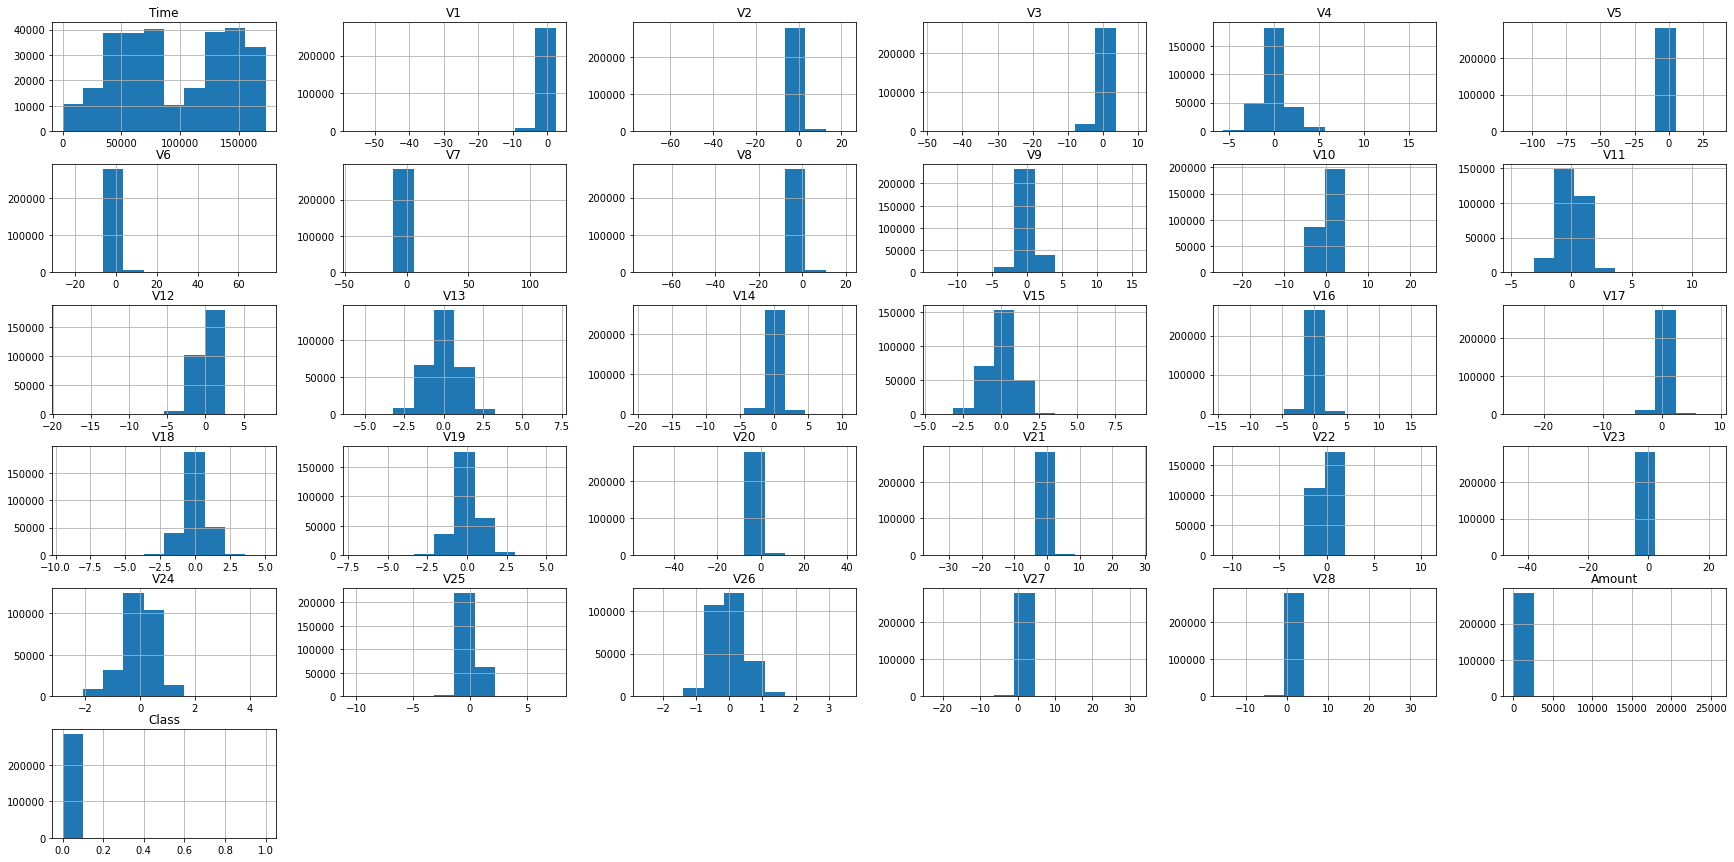

In [8]:
#Verificando a distribuição dos meus dados
df.hist(figsize=(30,15));

In [9]:
#Verificar a distribuição dos valores da coluna class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


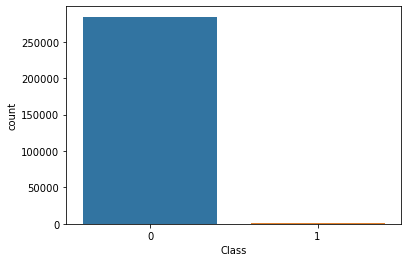

In [10]:
#Plotando em grafico
sns.countplot(df['Class']);

- Como podemos ver o numero de fraudes e extramamente pequeno e invisivel perante aos que não tiveram fraude, mas eu quero que meu modelo consiga identificar esses valores de fraude então vamos ter que dar um jeito.

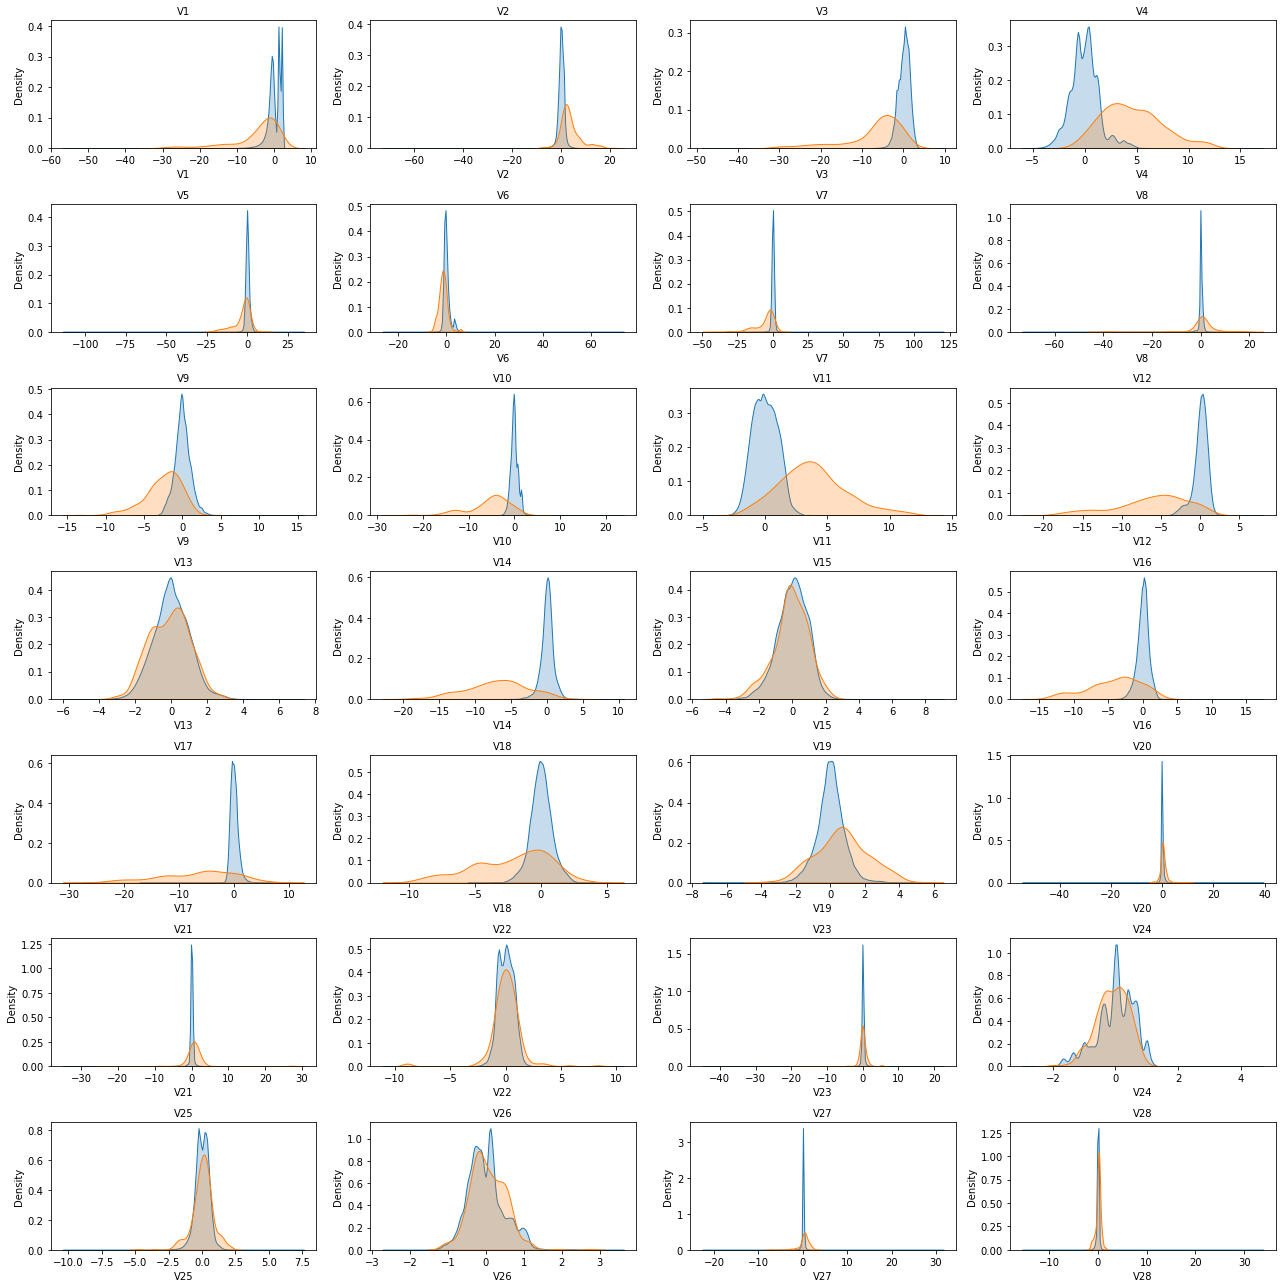

In [11]:
#Deixando apenas os valores que vão virar grafico.
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

#O tamanho do plot vai ser o tamanho dos valores que restaram.
num_plots = len(column_names)

#Pegando os valores de fraudes.
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

#Definindo o subplot.
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))

#ajustando os subplots
fig.subplots_adjust(hspace=1, wspace=1)

#plotando os graficos.
idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

- Com o grafico de densidade podemos ver anomalias nos nosos dados, vendo como por exemplo enquanto algumas features não tem nenhuma relação, outras já tem, pos quando uma sobe a outra sobe tambem podemos ver isso na feature V15, acredito que seja alguma coisa que o modelo vá considerar, e uma hipótese .

---

- E assim chegamos no fim da nossa analise explotaria.
    - Nela podemos notar comos valores estão sim extramamente desbalanceados e que com eles assim a aplicação do modelo e inviável.
    - E que existe algumas features que tem alguma relação, quando uma sobe (No mapa de densidade) a outra sobe também, pode ser um padrão do cliente ou talvez uma fraude, quem vai dizer e o modelo.

---

### Etapa 4: Balanceamento dos valores
- Para realizar esse baleceamento eu vou utilizar uma biblioteca chamada **imblearn** que facilita muito o processo de balanceamento dos dados, e para fazer isso eu vou separar os dados entre x e y antes e separar entre treino e teste para deixar o balanceamento mais fluido e coerente.

In [12]:
#Separando meus dados Entre X e y e entre dados de treino e teste

#Variavel que será usada para descobrir meu y
x = df.drop('Class',axis=1)
y = df['Class']

#Separando entre modelo de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=10)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

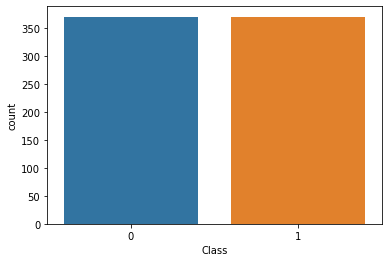

In [13]:
#Usando a tecnica under-sampling
rus = RandomUnderSampler()

#Treinando o modelo de vai fazer esse baleamento
x_rus, y_rus = rus.fit_resample(x_train,y_train)

#Exibindo em forma grafica
sns.countplot(y_rus)

---

- E pronto, agora com os graficos balanceados, podemos seguir em frente na aplicação do nosso modelo, agora ele vai conseguir aprender o que são modelos fraudulentos e assim conseguir classificar se é ou não é.

---

### Etapa 5: Aplicação do modelo de machine learning e Avaliação do melhor modelo

In [14]:
#Criando uma função que vai testar meus modelos.

def Avaliarmodelo(nome_modelo, y_test, previsao):
    sk = skplt.metrics.plot_confusion_matrix(y_test, previsao, normalize=True)
    cm = classification_report(y_test, previsao, digits=4)
    ac = accuracy_score(y_test,previsao)
    roc = roc_auc_score(y_test, previsao)
    return print(f'O Modelo: {nome_modelo}\nRelatório de Classificação:\n{cm}\nAcurácia: {ac:.4f}\nAUC: {roc:.4f}\n')

In [15]:
#Instanciando meus modelos em variaveis

#modelo_lc = LogisticRegression()
#modelo_dc = DecisionTreeClassifier()
modelo_rf = RandomForestClassifier()
#modelo_ex = ExtraTreeClassifier()
#modelo_nb = GaussianNB()
#modelo_kn = KNeighborsClassifier()
#modelo_svc = SVC()

#Criando um dicionario para acessar cada um de uma maneira mais facil
modelos = {
    #'Logistic Regression':modelo_lc,
    #'Decision Tree Classifier':modelo_dc,
    'Random Forest Classifier':modelo_rf,
    #'Extra Tree Classifier':modelo_ex,
    #'GaussianNB':modelo_nb,
    #'KNeighbors Classifier':modelo_kn,
    #'SVC':modelo_svc
}

O Modelo: Random Forest Classifier
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9998    0.9675    0.9834     71081
           1     0.0455    0.9091    0.0867       121

    accuracy                         0.9674     71202
   macro avg     0.5227    0.9383    0.5351     71202
weighted avg     0.9982    0.9674    0.9819     71202

Acurácia: 0.9674
AUC: 0.9383



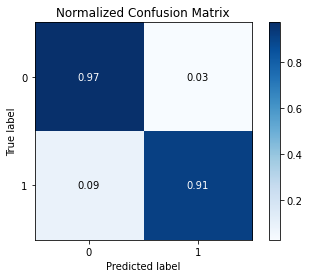

In [16]:
#Pecorendo minha lista dicionario e treinando o modelo

for nome_modelo, Modelo in modelos.items():
    #Treinando os modelos
    Modelo.fit(x_rus, y_rus)
    
    #Fazendo previsão com os modelos
    previsao = Modelo.predict(x_test)
    
    #Avaliando os modelos
    Avaliarmodelo(nome_modelo, y_test, previsao)

- Top 3 Modelos resultados:
    - Testei todos os modelos que importei e deixei os resultados dos 3 melhores abaixo (Para deixar as coisas mais organizadas)

---

O Modelo: Random Forest Classifier
- Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9998    0.9669    0.9831     71081
           1     0.0446    0.9091    0.0851       121

    - accuracy                         0.9668     71202
    - macro avg     0.5222    0.9380    0.5341     71202
    - weighted avg     0.9982    0.9668    0.9816     71202

- Acurácia: 0.9668
- AUC: 0.9380

---

O Modelo: Logistic Regression
- Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9999    0.9399    0.9689     71081
           1     0.0253    0.9174    0.0493       121

    - accuracy                         0.9398     71202
   - macro avg     0.5126    0.9286    0.5091     71202
   - weighted avg     0.9982    0.9398    0.9674     71202

- Acurácia: 0.9398
- AUC: 0.9286

---

O Modelo: Decision Tree Classifier
- Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9998    0.9025    0.9487     71081
           1     0.0156    0.9091    0.0307       121

   - accuracy                         0.9025     71202
   - macro avg     0.5077    0.9058    0.4897     71202
   - weighted avg     0.9982    0.9025    0.9471     71202

- Acurácia: 0.9025
- AUC: 0.9058

---

---

- E assim terminamos o a aplicação do modelo, como podemos notar eu testei varios modelos e achei o que de Random Forest o melhor para proseguir para melhorias, ele teve a maior Acurácidade e o recall dele está muito bom também, então ele e o nosso modelo campeão vamos ver o que podemos melhorar nele no nosso proximo passo.

---

### Etapa 6: Melhorias no melhor modelo
- O modelo campeão foi o Random Forest Classifier

O Modelo: Random Forest Classifier
Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9998    0.9799    0.9898     71081
           1     0.0714    0.9091    0.1324       121

    accuracy                         0.9797     71202
   macro avg     0.5356    0.9445    0.5611     71202
weighted avg     0.9983    0.9797    0.9883     71202

Acurácia: 0.9797
AUC: 0.9445



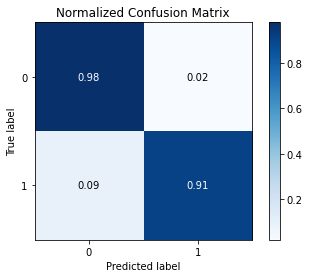

In [30]:
#Vou trazer todo o codigo para essa celula especifica, para testa de maneira mais rapida as mundaças no modelo.

#Variavel que será usada para descobrir meu y
x = df.drop('Class',axis=1)
#Variavel destino
y = df['Class']

#Separando entre modelo de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=10)

#Usando a tecnica under-sampling
rus = RandomUnderSampler()

#Treinando o modelo de vai fazer esse baleamento
x_rus, y_rus = rus.fit_resample(x_train,y_train)

#Modelo campeão, vamos colocar alguns parametros genericos para ver melhora ou piora.
modelo_rf = RandomForestClassifier(max_depth=7,n_estimators=200,max_features=14)

#Treinando o modelo campeão novamente
modelo_rf.fit(x_rus,y_rus)

#Fazendo a previsão com ele
previsao = modelo_rf.predict(x_test)

#Avaliando
Avaliarmodelo('Random Forest Classifier',y_test,previsao)

---

- E pronto conseguimos melhorar, alguns pontos importantes que são:
    - 1: Acurácidade do modelo: Foi de 0.96 para 0.97
    - 2: AUC: Foi de 0.93 para 0.94
    - 3: Nosso recall zero se manteve no mesmo padrão.

---

### Etapa 7: Conclusão

- Nesse projeto, trabalhamos com valores desbalanceados, algo que não é trivial, porém graças a isso eu pude aprender a como trabalhar com dados assim, e conseguir mesmo atraves de valores tão baixos de fraudes, fazer um modelo que tenha 0.97% de Acurácidade que para mim está exelente, claro que ainda há espaços para mais teste, nesse projeto eu utilizei 7 modelos, porém existem muito mais que talvez consigam uma performace melhor, mas eu paro por aqui pois estou sadisfeito.

- Obrigado, até a proxima.